<a href="https://colab.research.google.com/github/ozyeon/DataTranslator_2022_w2/blob/main/SC_W1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Tree 분류 모형

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.051\nsamples = 38\nvalue = [0, 37, 1]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.136\nsamples = 41\nvalue = [0, 3, 38]\nclass = virginica')]

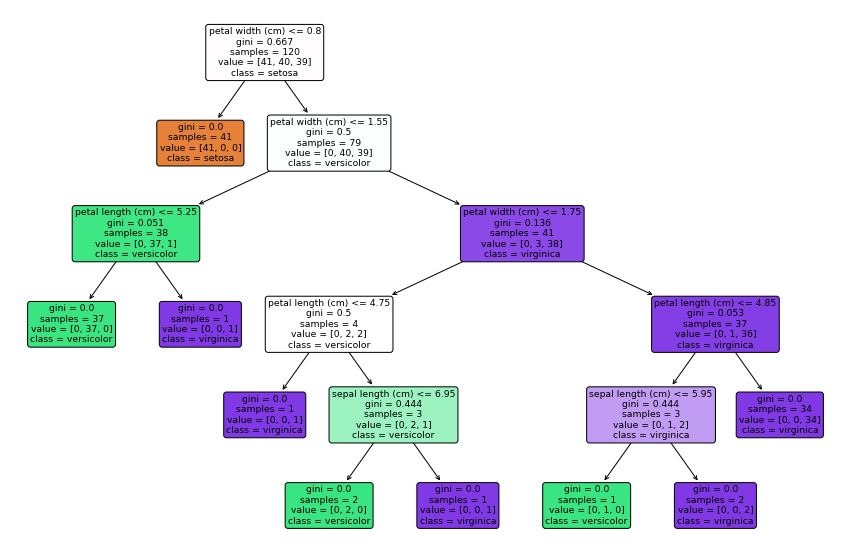

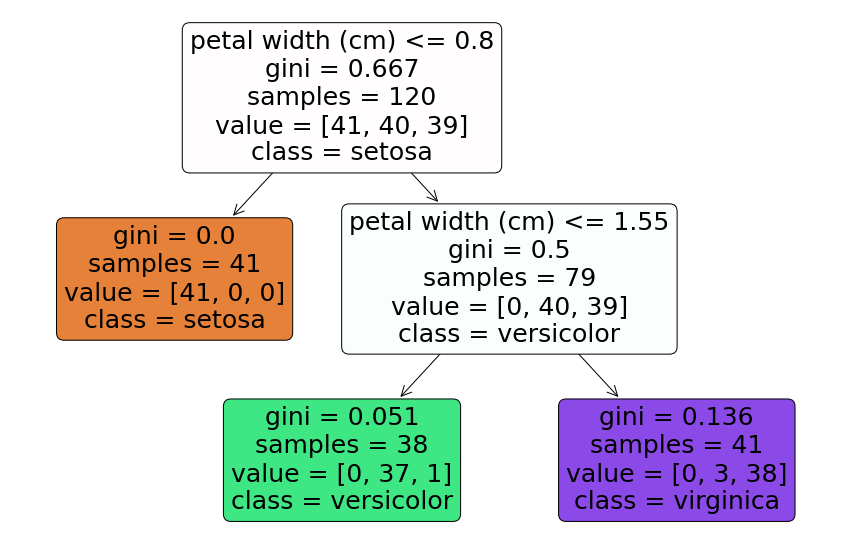

In [14]:
#Decision Tree Review
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Data 전처리
iris = load_iris()
#iris.target=pd.get_dummies(iris.target)
#iris.target=iris.target.idxmax(axis=1)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

# 학습
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)
# model = DecisionTreeClassifier().fit(X_train, y_train) -> 이렇게 한줄로 줄일 수 있음
# 분류모형함수().fit(x변수, y변수)


# 결과 시각화
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure( figsize=(15,10) )
tree.plot_tree(model, 
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=True, filled=True, rounded=True)

#가지치기(Pruning) -> 오버피팅 방지
model = DecisionTreeClassifier(max_depth=2, random_state=1)
model.fit(X_train, y_train)

# 결정트리 규칙 시각화
plt.figure( figsize=(15,10) )
tree.plot_tree(model, 
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=True, filled=True, rounded=True)

In [13]:
#Decision Tree Review
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Data 전처리
iris = load_iris()
# iris.target=pd.get_dummies(iris.target)
# iris.target=iris.target.idxmax(axis=1)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)

# 학습
# model = DecisionTreeClassifier().fit(iris.data, iris.target)
model = DecisionTreeClassifier().fit(X_train, y_train)

# test를 넣고 예측해보기
print(model.predict(X_test))
print(y_test)
model.score(X_test, y_test)   # 성능 측정, 정분류율, accuracy

[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]
[2 2 2 1 2 0 1 0 0 1 2 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]


0.9333333333333333

In [34]:
sp500 = pd.read_csv("sp500_tm.csv")
sp500.isnull().mean()   # 결측치 확인

from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(sp500.iloc[0:100, 0:3])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled, sp500["Direction"], test_size=0.3)

model = DecisionTreeClassifier().fit(X_train, y_train)

model.score(X_test, y_test)   # 성능 측정, 정분류율, accuracy

0.26666666666666666

In [40]:
sp500 = pd.read_csv("sp500_tm.csv")
sp500.Direction     # 한번에 하나의 컬럼만 선택 가능
sp500["Direction"]  # 2개 이상의 컬럼도 선택 가능
sp500[["avgNeg","Direction"]]
vars = ["avgNeg","Direction"]
sp500[vars]
sp500.drop("Direction", axis=1)   # 컬럼 삭제
sp500.drop(vars, axis=1)          # 복수개의 컬럼 삭제
sp500.drop(vars, axis=1, inplace=True)   # 복수개의 컬럼 삭제 후 원본반영

sp500 = pd.read_csv("sp500_tm.csv")

X_train, X_test, y_train, y_test = train_test_split(
    sp500.drop("Direction", axis=1),  # x변수들
    sp500.Direction,                  # y변수
    test_size=0.3
)

,avgNeg,Direction
0,42,0
1,45,1
2,94,1
3,167,0
4,79,0
...,...,...
95,276,0
96,198,0
97,53,1
98,94,0


In [61]:
credit = pd.read_csv("creditset.csv", index_col = 0)    # 첫번째 컬럼은 인덱스 처리
credit.drop("LTI", axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    credit.drop("default10yr", axis=1),
    credit.default10yr,
    test_size=0.2
)

model2 = DecisionTreeClassifier().fit(X_train, y_train)
model2.score(X_test, y_test)   # 성능 측정, 정분류율, accuracy

from sklearn.metrics import classification_report
print(classification_report(model2.predict(X_test), y_test))  # 예측값, 실제y값

# RF 모델링
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=500).fit(X_train, y_train)
model3.score(X_test, y_test)   # 성능 측정, 정분류율, accuracy
print(classification_report(model3.predict(X_test), y_test))  # 예측값, 실제y값

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       339
           1       0.91      0.98      0.94        61

    accuracy                           0.98       400
   macro avg       0.95      0.98      0.97       400
weighted avg       0.98      0.98      0.98       400

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       339
           1       0.92      1.00      0.96        61

    accuracy                           0.99       400
   macro avg       0.96      0.99      0.98       400
weighted avg       0.99      0.99      0.99       400



In [73]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.isnull().mean()
test.isnull().mean()

from sklearn.preprocessing import MinMaxScaler
X_train = MinMaxScaler().fit_transform(train.drop("label", axis=1))
X_test = MinMaxScaler().fit_transform(test.drop("label", axis=1))

y_train = train.label
y_test = test.label

model_DT = DecisionTreeClassifier().fit(X_train, y_train)
model_RF = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

print(classification_report(model_DT.predict(X_test), y_test))  # 예측값, 실제y값
print(classification_report(model_RF.predict(X_test), y_test))  # 예측값, 실제y값

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       104
           1       0.93      0.90      0.92       103
           2       0.75      0.74      0.74       102
           3       0.69      0.70      0.69        99
           4       0.77      0.77      0.77       100
           5       0.67      0.73      0.70        92
           6       0.76      0.78      0.77        98
           7       0.81      0.84      0.82        97
           8       0.73      0.72      0.72       102
           9       0.72      0.70      0.71       103

    accuracy                           0.78      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.78      0.78      0.78      1000

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        95
           1       0.98      0.97      0.98       101
           2       0.96      0.95      0.96       101
           3       0.86 

In [84]:
binary = pd.read_csv("binary.csv")
binary.isnull().mean()

X_train, X_test, y_train, y_test = train_test_split(
    MinMaxScaler().fit_transform(binary.drop("admit", axis=1)),
    binary.admit,
    test_size=0.2
)

rf = RandomForestClassifier().fit(X_train, y_train)
print(classification_report(rf.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        61
           1       0.45      0.53      0.49        19

    accuracy                           0.74        80
   macro avg       0.65      0.66      0.66        80
weighted avg       0.75      0.74      0.74        80



- Partitioning + Classification

In [ ]:
#-----------------------------------------------------------#
# module
import pandas as pd
import numpy as np

from sklearn import linear_model, metrics, preprocessing
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


#-----------------------------------------------------------#
#Decision Tree + Partitioning

csv_data = pd.read_csv("creditset.csv")
csv_data = csv_data.values
csv_data.shape
X = csv_data[:, 1:4 ]
y  = csv_data[:, 5 ]
X.shape
y.shape

#y=pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 )

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform( X_train)
X_test  = scaler.fit_transform( X_test  )

type(X_train)
type(y_train)

dt1 = tree.DecisionTreeClassifier()
dt1 = dt1.fit(X_train, y_train)
dt1.feature_importances_

pred = dt1.predict( X_test)
np.mean( pred == y_test )

dt1.tree_
dt1.tree_.children_left
dt1.tree_.children_right
dt1.tree_.feature
dt1.tree_.threshold
dt1.tree_.value

# 2. Random Forest

In [ ]:
#-----------------------------------------------------------#
#Random Forest

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
#n_estimators: number of trees
#criterion: string, default "gini", 또는 "entropy"가능
#max_features: default는 auto, 각 분기에 사용할 변수의 수
#max_depth: default는 None이며, 정수
#oob_score: bool, default=False
#n_jobs: numer of parallel jobs, -1이면 컴퓨터 CPU 코어 수로 지정됨
#random_state

rf.fit(X_train, y_train)
rf.estimators_
rf.classes_
rf.n_classes_
rf.n_features_
rf.n_outputs_
rf.feature_importances_
rf.oob_score_

rf.decision_path(X_test)

predicted = rf.predict(X_test)

rf.score(X_test, y_test)
np.mean( predicted == y_test )
accuracy = accuracy_score(y_test, predicted)


# 3. DT vs RF
 - 아래 CSV 파일에 대해 DT, RF의 성능을 비교
 - sp500_tm.csv
 - Direction이 Y변수, 나머지 X변수
 - 7:3으로 파티셔닝
 - RF: n_estimator 100

In [ ]:
csv_data = pd.read_csv("sp500_tm.csv")	
csv_data = csv_data.values
csv_data.shape
y  = 
X = 

X_train, X_test, y_train, y_test = 

#-----------------------------------------------------------#
#Decision Tree



#-----------------------------------------------------------#
#Random Forest






 - sms.csv에 대해서도 DT vs RF 해보세요